In [5]:
pip install tensorflow==2.5.0

     -------------------------------------- 422.6/422.6 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.9/2.9 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 132.0/132.0 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 462.4/462.4 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 13.3/13.3 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 420.6/420.6 kB 2.6 MB/s eta 0:00:00
     -------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
pylint 2.14.5 requires typing-extensions>=3.10.0; python_version < "3.10", but you have typing-extensions 3.7.4.3 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
bokeh 2.4.3 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.
black 22.6.0 requires typing-extensions>=3.10.0.0; python_version < "3.10", but you have typing-extensions 3.7.4.3 which is incompatible.
astroid 2.11.7 requires typing-extensions>=3.10; python_version < "3.10", but you have typing-extensions 3.7.4.3 which is incompatible.


In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
import numpy as np
import pandas as pd

In [7]:
a = tf.add(3, 5)
print(a)

Tensor("Add:0", shape=(), dtype=int32)


In [8]:
a = tf.add(3, 5)
sess = tf.Session()
print(sess.run(a))

8


In [9]:
sess.close()

In [10]:
a = tf.add(3, 5)
with tf.Session() as sess:
    print(sess.run(a))

8


In [11]:
x = 2
y = 3 
op1 = tf.add(x, y)
op2 = tf.multiply(x, y)
op3 = tf.pow(op2, op1)

In [12]:
with tf.Session() as sess:
    op3 = sess.run(op3)
    print(op3)

7776


In [13]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [15]:
x_data = datasets.load_boston().data[:, 12]
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [16]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b # model

In [17]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variables 초기화 
    
    for step in range(10000):
        sess.run(train) # 실제로 Gradient Descent가 실행되는 코드 
        if step % 1000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()
            
    w_out, b_out = sess.run([w, b])

Step 0: w [0.2585815] b [-0.6596953]
loss 509.6607666015625

Step 1000: w [0.35507017] b [12.815334]
loss 152.4705352783203

Step 2000: w [-0.14311329] b [21.113245]
loss 82.0577392578125

Step 3000: w [-0.45113248] b [26.243713]
loss 55.14060592651367

Step 4000: w [-0.64157575] b [29.415802]
loss 44.8508186340332

Step 5000: w [-0.75932485] b [31.37707]
loss 40.9172477722168

Step 6000: w [-0.83212644] b [32.58968]
loss 39.41353988647461

Step 7000: w [-0.8771392] b [33.339424]
loss 38.83871078491211

Step 8000: w [-0.90496975] b [33.802982]
loss 38.618961334228516

Step 9000: w [-0.92217714] b [34.089596]
loss 38.53494644165039



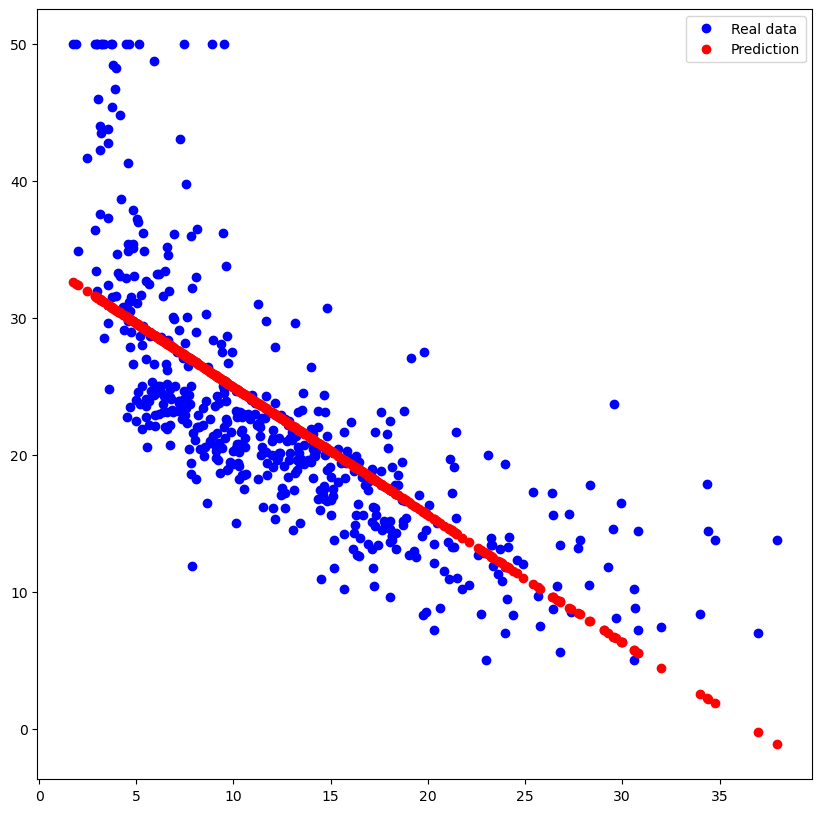

In [20]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [11]:
x_data = datasets.load_boston().data[:,12]
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [16]:
_x_data = tf.reshape(x_data, [len(x_data), 1])

W = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64))
W_out = tf.Variable(tf.random_normal([5, 1], dtype=tf.float64))

hidden = tf.nn.sigmoid(tf.matmul(_x_data, W))
output = tf.matmul(hidden, W_out)

In [17]:
loss = tf.reduce_mean(tf.square(output - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

    output = sess.run(output) 

Step 0 || Loss : 530.8673062503374
Step 5000 || Loss : 84.44188899380359
Step 10000 || Loss : 84.43458944034398
Step 15000 || Loss : 84.43105953765446
Step 20000 || Loss : 84.42893723993853
Step 25000 || Loss : 84.42750678174389
Step 30000 || Loss : 84.42647148581682
Step 35000 || Loss : 84.42568465904141
Step 40000 || Loss : 84.425064915633
Step 45000 || Loss : 84.42456325815058


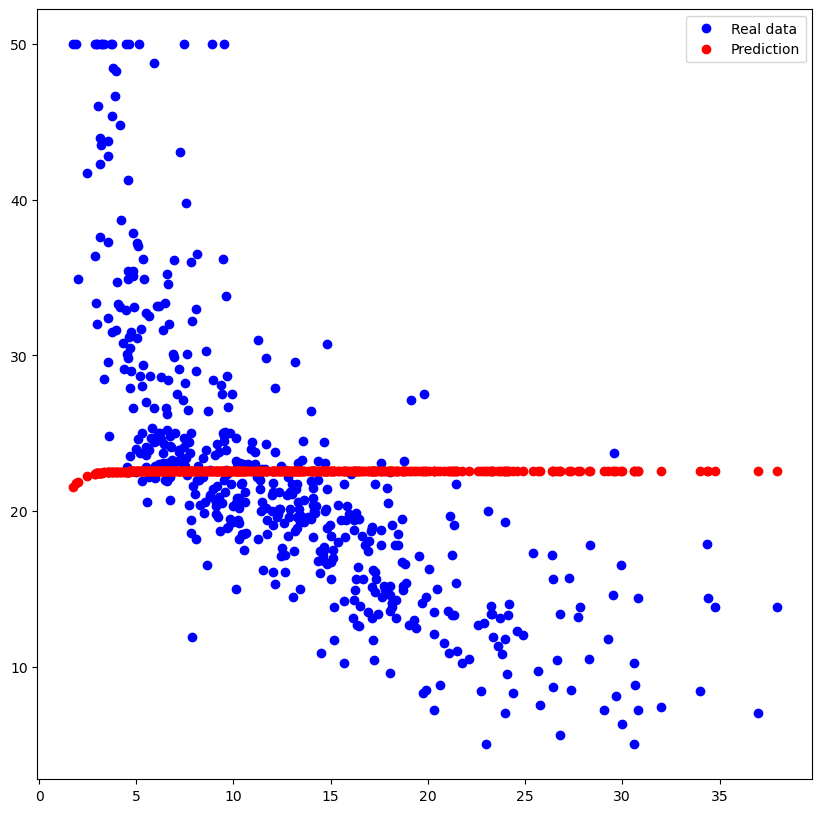

In [20]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()

In [23]:
_x_data = tf.reshape(x_data, [len(x_data), 1])

W1 = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64))
W2 = tf.Variable(tf.random_normal([5, 10], dtype=tf.float64))
W_out = tf.Variable(tf.random_normal([10, 1], dtype=tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
output = tf.matmul(hidden2, W_out)

In [24]:
loss = tf.reduce_mean(tf.square(output - y_data))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

    output = sess.run(output) 

Step 0 || Loss : 458.6069073642914
Step 5000 || Loss : 84.43741908563703
Step 10000 || Loss : 84.42061431766612
Step 15000 || Loss : 84.41966610723401
Step 20000 || Loss : 84.419567489639
Step 25000 || Loss : 84.4195572299557
Step 30000 || Loss : 84.41955635729198
Step 35000 || Loss : 84.41955741563442
Step 40000 || Loss : 84.41985590656105
Step 45000 || Loss : 84.41955630396362


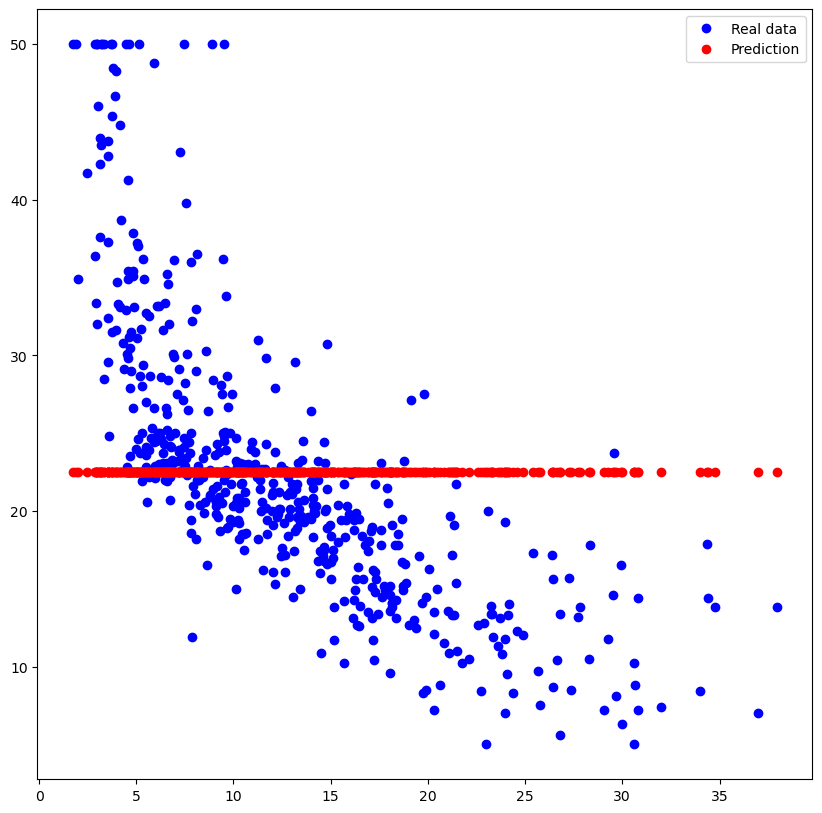

In [26]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()

In [27]:
# y 데이터는 1차원 행렬인데 
# output은 2차원 배열이기 때문에 위와 같은 결과가 나오는 것

In [45]:
_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(y_data), 1])

W1 = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64))
W2 = tf.Variable(tf.random_normal([5, 10], dtype=tf.float64))
W_out = tf.Variable(tf.random_normal([10, 1], dtype=tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
output = tf.matmul(hidden2, W_out)

In [46]:
loss = tf.losses.mean_squared_error(output, _y_data)
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

In [47]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

    output = sess.run(output) 

Step 0 || Loss : 5893.62890625
Step 5000 || Loss : 38.91511535644531
Step 10000 || Loss : 28.195329666137695
Step 15000 || Loss : 27.241239547729492
Step 20000 || Loss : 27.136539459228516
Step 25000 || Loss : 27.074716567993164
Step 30000 || Loss : 27.046327590942383
Step 35000 || Loss : 27.033117294311523
Step 40000 || Loss : 27.025951385498047
Step 45000 || Loss : 27.0213680267334


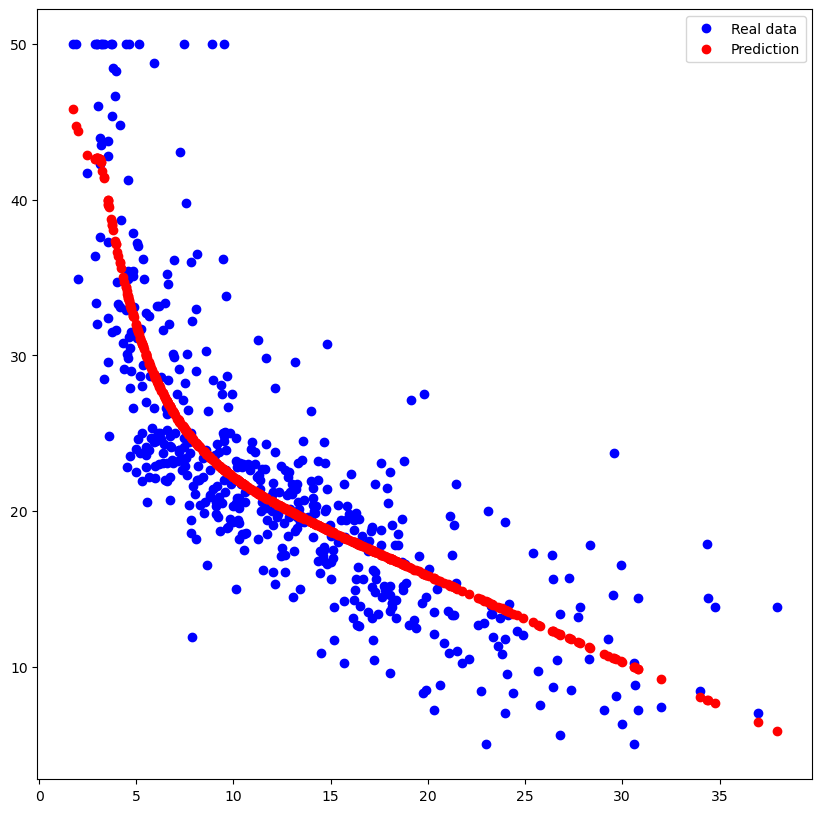

In [48]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()

In [ ]:
# end of file